# Код основной части программы

In [32]:
import  sys

import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    N,Time_C,Mode,T_1_10,S_1_10,System_state = values()

#### 1 функция - получения всех значений из БД, кроме тех где system_state = false

In [30]:
def values():
    filename = "zadacha2.csv"
    i = 0
    f = open(filename)
    N = []  #номер
    Time_C = [] #время отсчёта
    Mode = [] # режим работы
    T_1 = []  # Температуры блоков
    T_2 = []
    T_3 = []
    T_4 = []
    T_5 = []
    T_6 = []
    T_7 = []
    T_8 = []
    T_9 = []
    T_10 = []
    S_1 = [] #состояния каждого из 10 блоков
    S_2 = []
    S_3 = []
    S_4 = []
    S_5 = []
    S_6 = []
    S_7 = []
    S_9 = []
    S_8 = []
    S_10 = []
    System_state = []#состояния системы
    for elem in f:
        N_i=elem.split(";")[1]
        Time_C_i= elem.split(";")[2]
        if i == 0:  # скип первой строчки
            i = 1
            continue
        if  elem.split(";")[24] == "False\n":
            continue
        N.append(int(N_i))
        Time_C.append(int(Time_C_i))
        Mode.append(int(elem.split(";")[3]))
        T_1.append(float(elem.split(";")[4]))
        T_2.append(float(elem.split(";")[5]))
        T_3.append(float(elem.split(";")[6]))
        T_4.append(float(elem.split(";")[7]))
        T_5.append(float(elem.split(";")[8]))
        T_6.append(float(elem.split(";")[9]))
        T_7.append(float(elem.split(";")[10]))
        T_8.append(float(elem.split(";")[11]))
        T_9.append(float(elem.split(";")[12]))
        T_10.append(float(elem.split(";")[13]))
        S_1.append(elem.split(";")[14])
        S_2.append(elem.split(";")[15])
        S_3.append(elem.split(";")[16])
        S_4.append(elem.split(";")[17])
        S_5.append(elem.split(";")[18])
        S_6.append(elem.split(";")[19])
        S_7.append(elem.split(";")[20])
        S_8.append(elem.split(";")[21])
        S_9.append(elem.split(";")[22])
        S_10.append(elem.split(";")[23])
        System_state.append(elem.split(";")[24])


    T_1_10 = [T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10]
    S_1_10 = [S_1, S_2, S_3, S_4, S_5, S_6, S_7, S_8,S_9, S_10]
    return [N,Time_C,Mode,T_1_10,S_1_10,System_state]

#### вторая и третия функция  - автокореллиация и её построение  
<font color = "green"> Автокорреляция — статистическая взаимосвязь между последовательностями величин одного ряда, взятыми со сдвигом,по её результат видно что температурный блок не связан с сам собой по смещению ( глупость написал наверное)</font>

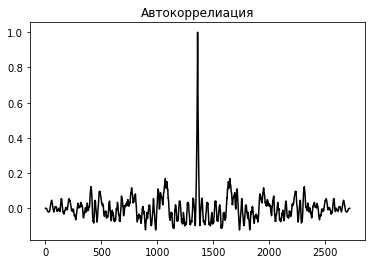

In [35]:
def autocorrelation(t_1_10):  # автокореллиация c учётом не работющих блоков

    result = [[],[],[],[],[],[],[],[],[],[]]
    for i in range (0,10):
        n = len(t_1_10[i])
        x=t_1_10[i]
        variance = np.var(x)
        x = x-np.mean(x)
        r = np.correlate(x, x, mode = 'full')

        result[i] = r/(variance*n)
    return result

def plot_autocorrelation(T_1_10_acf):
    plt.plot(T_1_10_acf,"black")
    plt.title("Автокоррелиация")
    plt.show()

#-------------------------------------
    
T_1_10_acf = autocorrelation(T_1_10)
   #постороение графика для 5 температурного блока
plot_autocorrelation(T_1_10_acf[4])

#### Четвёрта функция - определение границ включения
<font color = "green">проведя Анализ для границ температу в каждом из режимов я сделал следущие выводы
    <br> 1) температурные границы для 1 и 2 режима работы очень близки к друг другу </br>
    <br>2) для 4 режима работы у всех блоков порог включения примерно равен 32 градусам , а порог выключения примерно равен 62 градусам </br> </font>

In [ ]:
def granica(mode,T):#так как я отбросил все результаты где состояние системы было False  , границы будут
    #определяться min и max элементами для каждого из режимов работы

    T_m1 = []
    T_m2 = []
    T_m4 = []
    T_m3 = []
    T_m0 = []

    for i in range (0,len(mode)-1):
        if mode[i] == 1:
            T_m1.append(T[i])
        if mode[i] == 2:
            T_m2.append(T[i])
        if mode[i] == 3:
            T_m3.append(T[i])
        if mode[i] == 4:
            T_m4.append(T[i])
        if mode[i] == 0:
            T_m0.append(T[i])


    print ('''Пороги включения
       1 режим работы - {0} - {1}
       2 режим работы - {2} - {3}
       3 режим работы - {4} - {5}
       4 режим работы - {6} - {7}
       0 режим работы - {8} - {9}'''.format(min(T_m1),max(T_m1),min(T_m2), max(T_m2),min(T_m3),max(T_m3),min(T_m4),max(T_m4),min(T_m0),max(T_m0)))


for i in range (9):
    print(i,"-ый блок")
    granica(Mode,T_1_10[i])

#### пятаная функция - спектральный анализ

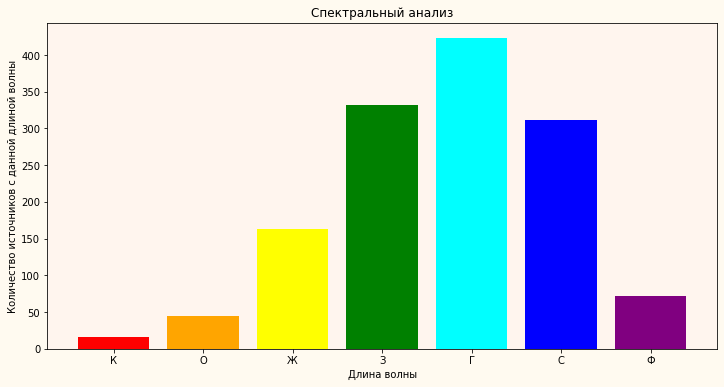

In [33]:
def spectral_analyzies(T):
    #исхожу их того что чем больше температура тем длинее длина волны
    Min = min(T)
    Max = max(T)
    h = (Max - Min)/7 #КОЖЗГСФ
    Colors = [0*i for i in range (0,7)]
    x      = [0 * i for i in range(0, 7)]
    for elem in T:
        b=int((elem-Min)/h)
        if b == 7:
            b = b - 1
        Colors[b] += 1
    for i in range(0,7):
        x[i]=50*i+350

    fig, ax = plt.subplots()
    ax.bar(["К","O","Ж","З","Г","С","Ф"],Colors,color = ["Red","Orange","Yellow","green","cyan","Blue","purple"])


    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)  # ширина Figure
    fig.set_figheight(6)  # высота Figure

    plt.xlabel("Длина волны")
    plt.ylabel("Количество источников с данной длиной волны")
    plt.title("Спектральный анализ")
    plt.show()
    

    
spectral_analyzies(T_1_10[1])


#### Шестая функция - влияние соседних блоков друг на друга (коррелиация)
<font color = "green">по ней можно понять  , как соседние блоки связаны между собой, если коэф смещается к 1 то это значит что СВ взаимосвязаны, 
в нашем случае коэфицент практические всегда близок к 0.1 , что говорит об существовании связи между соседними блоками </font>

In [ ]:

def cross_correleation(first,second): 
    a = (first - np.mean(first)) / (np.std(first) * len(first))
    b = (second - np.mean(second)) / (np.std(second))
    plt.plot(np.correlate(a,b,"full"),"o")
    plt.xlabel("")
    print(len(first),"=",len(second))
    
    
cross_correleation(T_1_10[9],T_1_10[8])

#### Седьмая функция получение всех элементов БД

In [3]:
def values_with_errors():  #получение всех значаний из таблицы
    filename = "zadacha2.csv"
    i = 0
    f = open(filename)
    N = []  #номер
    Time_C = [] #время отсчёта
    Mode = [] # режим работы
    T_1 = []  # Температуры блоков
    T_2 = []
    T_3 = []
    T_4 = []
    T_5 = []
    T_6 = []
    T_7 = []
    T_8 = []
    T_9 = []
    T_10 = []
    S_1 = [] #состояния каждого из 10 блоков
    S_2 = []
    S_3 = []
    S_4 = []
    S_5 = []
    S_6 = []
    S_7 = []
    S_9 = []
    S_8 = []
    S_10 = []
    System_state = []#состояния системы
    for elem in f:
        N_i=elem.split(";")[1]
        Time_C_i= elem.split(";")[2]
        if i == 0:  # скип первой строчки
            i = 1
            continue
        N.append(int(N_i))
        Time_C.append(int(Time_C_i))
        Mode.append(int(elem.split(";")[3]))
        T_1.append(float(elem.split(";")[4]))
        T_2.append(float(elem.split(";")[5]))
        T_3.append(float(elem.split(";")[6]))
        T_4.append(float(elem.split(";")[7]))
        T_5.append(float(elem.split(";")[8]))
        T_6.append(float(elem.split(";")[9]))
        T_7.append(float(elem.split(";")[10]))
        T_8.append(float(elem.split(";")[11]))
        T_9.append(float(elem.split(";")[12]))
        T_10.append(float(elem.split(";")[13]))
        S_1.append(elem.split(";")[14])
        S_2.append(elem.split(";")[15])
        S_3.append(elem.split(";")[16])
        S_4.append(elem.split(";")[17])
        S_5.append(elem.split(";")[18])
        S_6.append(elem.split(";")[19])
        S_7.append(elem.split(";")[20])
        S_8.append(elem.split(";")[21])
        S_9.append(elem.split(";")[22])
        S_10.append(elem.split(";")[23])
        System_state.append(elem.split(";")[24])


    T_1_10 = [T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10]
    S_1_10 = [S_1, S_2, S_3, S_4, S_5, S_6, S_7, S_8,S_9, S_10]
    return [N,Time_C,Mode,T_1_10,S_1_10,System_state]


N_f,Time_C_f,Mode_f,T_1_10_f,S_1_10_f,System_state_f = values_with_errors()

#### Восьмая функция - восстановение логической схемы

* посмотрев на таблицу истинности представленную ниже можно сказать , что система работает тогда когда все элементы работают, или не работает только 1

In [ ]:
def logick_schem(S_1_10_f,System_state_f):
    s1 = np.array(S_1_10_f[0])
    s2 = np.array(S_1_10_f[1])
    s3 = np.array(S_1_10_f[2])
    s4 = np.array(S_1_10_f[3])
    s5 = np.array(S_1_10_f[4])
    s6 = np.array(S_1_10_f[5])
    s7 = np.array(S_1_10_f[6])
    s8 = np.array(S_1_10_f[7])
    s9 = np.array(S_1_10_f[8])
    s10 = np.array(S_1_10_f[9])
    sf = np.array(System_state_f)
    np.set_printoptions(threshold=sys.maxsize)
    s_n = []
    for i in range(len(s1)):
        if [s1[i], s2[i], s3[i], s4[i], s5[i], s6[i], s7[i], s8[i],s9[i], s10[i], sf[i]] not in s_n:
            s_n.append([s1[i], s2[i], s3[i], s4[i], s5[i], s6[i], s7[i], s8[i],s9[i], s10[i], sf[i]])

    a = s_n[4][10]
   
    for i in range(len(s_n)):
        for j in range(0,10):
            if s_n[i][j] == "True":
                s_n[i][j]= int(1)
            if s_n[i][j] == "False":
                s_n[i][j]= 0
    print("   s1  s2  s3  s4  s5  s6  s7  s8  s9  s10  sf")
    print(np.array(s_n)[0:25,:])
    #a = np.array([[1,2,3],[4,5,6],[7,8,9]])
    #print(a[0,:])
     
logick_schem(S_1_10_f,System_state_f)

#### Функция построения времянного ряда для работающих блоков
<font color = "green">Из визуального анализа данных графиков можно заключить, что все ряды для температур представляют собой
циклические процессы нагрева и остывания, причем большую часть времени в рамках датасета температуры блоков
совершают близкое к периодическому движение со слабо меняющимся от цикла к циклу периодом</font>

In [ ]:
def plot_time_row(T_1_10,T):
    
    plt.plot(T,T_1_10)
    plt.title("температурный ряд")
    plt.xlabel("времянной отсчёт")
    plt.ylabel("график температурного ряда")
    plt.show()

a=5 #выбор нужного по счёту ряда ,ОДЗ  1 - 10  

plot_time_row(T_1_10[1],Time_C)

#### Прогназирование температурного ряда на 10 отсчётов вперёд методом Arima. Ресурс - https://habr.com/ru/company/ods/blog/327242/

Cначала нужно проверить является ли тренд стационарным с помощью критерия Дики-Фуллера, а потом уже использовать метод ARIMA


In [51]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
T = T_1_10_f[1] 
print('Критерий Дики-Фуллера = {0} '.format(sm.tsa.stattools.adfuller(T)[1]))
model = ARIMA(T, order=(6, 0, 1))
model_fit = model.fit(disp=False)
# Теперь я мыслю так, чтобы достичь 80 процентов точности нужно построить предсказание на 200 последних элементов 
# и проверить точность предсказания, меняя параметры метода до тех пор пока точность не будет равна 80, потом с этими же 
#параметрами предсказать на 10 шагов вперёд
training = model_fit.predict(len(T)-199, len(T))
b = np.array(T)


test = b[len(T)-200:len(T)]

x= 100-abs(((training-test)/test)*100)
print("Средняя точность предсказания в процентах на последние 200 элементов ряда ",np.mean(x))
#plt.plot(a)
#=[i for i in range (len(b),len(b)+11)]
#lt.plot(x,yhat,'green')
#lt.show()

Критерий Дики-Фуллера = 1.0022193510835745e-24 
Средняя точность предсказания в процентах на последние 200 элементов ряда  98.22147858601686


Как видно точность выше требуемой, так что это не страшно

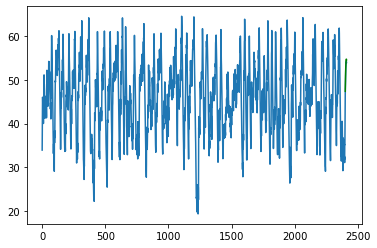

In [53]:
yhat = model_fit.predict(len(T), len(T)+10)
plt.plot(a)
x=[i for i in range (len(b),len(b)+11)]
plt.plot(x,yhat,'green')
plt.show()